In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Import data
data = pd.read_excel('hasil_preprocessing_before_covid.xlsx')
data = data[['Stemming', 'Sentiment']]
data

,Stemming,Sentiment
0,fasilitas hotel bagus kamar mewah protokol kov...,Positive
1,makan enak harga jangkau mantap,Positive
2,layan hotel bersih,Positive
3,nyaman inap layan muas kesini,Positive
4,kamar luas nyaman bersih pandang hotel bagus l...,Positive
...,...,...
2304,desain hotel bagus bau hotel lobi koridor kama...,Positive
2305,staf profesional,Positive
2306,suasana enak keluarga staf hotel oke layan bre...,Positive
2307,ruang luas staf bantu taman main tunggang kuda...,Positive


In [ ]:
# Pisahkan data berdasarkan sentimen
data_sentimen_positif = data[data['Sentiment'] == 'Positive']
data_sentimen_negatif = data[data['Sentiment'] == 'Negative']

# Hitung kata-kata yang sering muncul dalam sentimen positif dan negatif
kata_positif = Counter(" ".join(data_sentimen_positif['Stemming']).split())
kata_negatif = Counter(" ".join(data_sentimen_negatif['Stemming']).split())

# Tampilkan kata-kata yang sering muncul dalam sentimen positif dan negatif
print("Kata-kata yang sering muncul dalam sentimen positif:")
print(kata_positif.most_common(5))

print("\nKata-kata yang sering muncul dalam sentimen negatif:")
print(kata_negatif.most_common(5))


Kata-kata yang sering muncul dalam sentimen positif:
[('hotel', 1348), ('kamar', 1299), ('layan', 654), ('bersih', 628), ('ramah', 613)]

Kata-kata yang sering muncul dalam sentimen negatif:
[('kamar', 392), ('hotel', 318), ('makan', 111), ('kolam', 94), ('bagus', 92)]


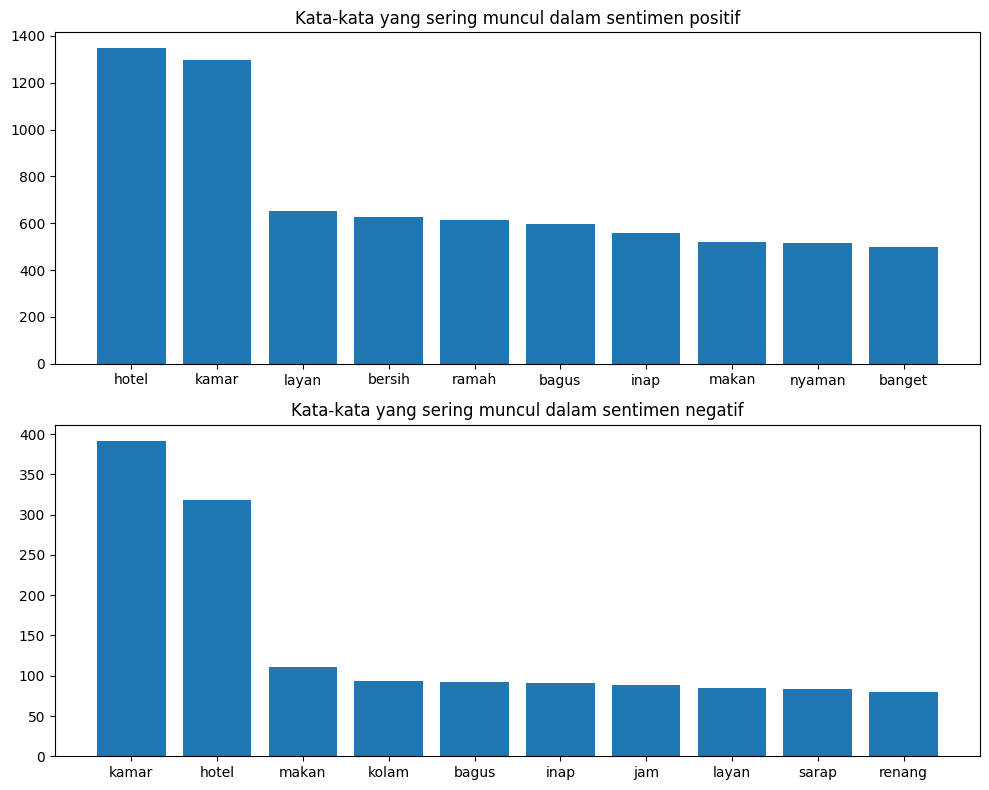

In [ ]:
# Buat grafik batang untuk kata-kata yang sering muncul
kata_terbanyak_positif = dict(kata_positif.most_common(10))
kata_terbanyak_negatif = dict(kata_negatif.most_common(10))

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].bar(kata_terbanyak_positif.keys(), kata_terbanyak_positif.values())
ax[0].set_title('Kata-kata yang sering muncul dalam sentimen positif')
ax[1].bar(kata_terbanyak_negatif.keys(), kata_terbanyak_negatif.values())
ax[1].set_title('Kata-kata yang sering muncul dalam sentimen negatif')
plt.tight_layout()
plt.show()

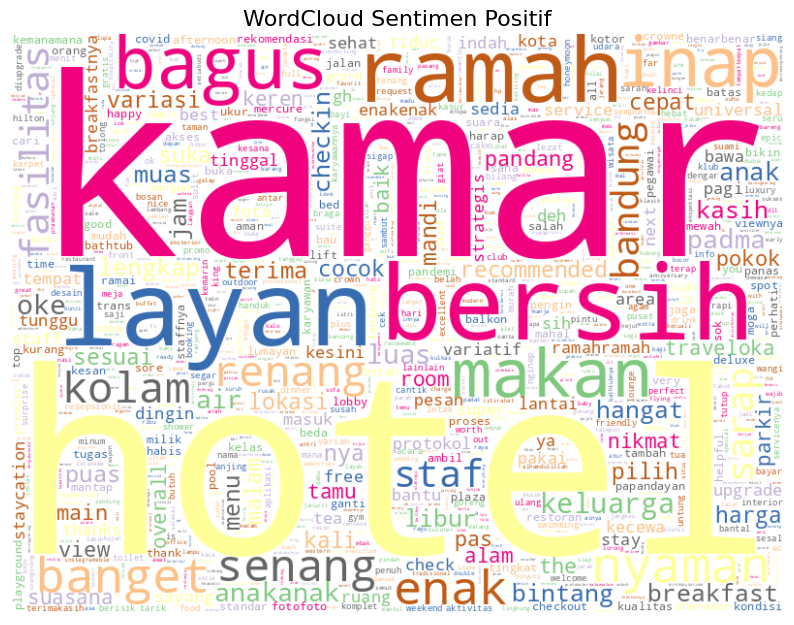

In [ ]:
# Membuat WordCloud untuk sentimen positif
wordcloud_positif = WordCloud(max_words=50000, background_color='white', colormap='Accent',
                             width=800, height=600).generate_from_frequencies(kata_positif)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('WordCloud Sentimen Positif', fontsize=16)
plt.axis('off')
plt.show()

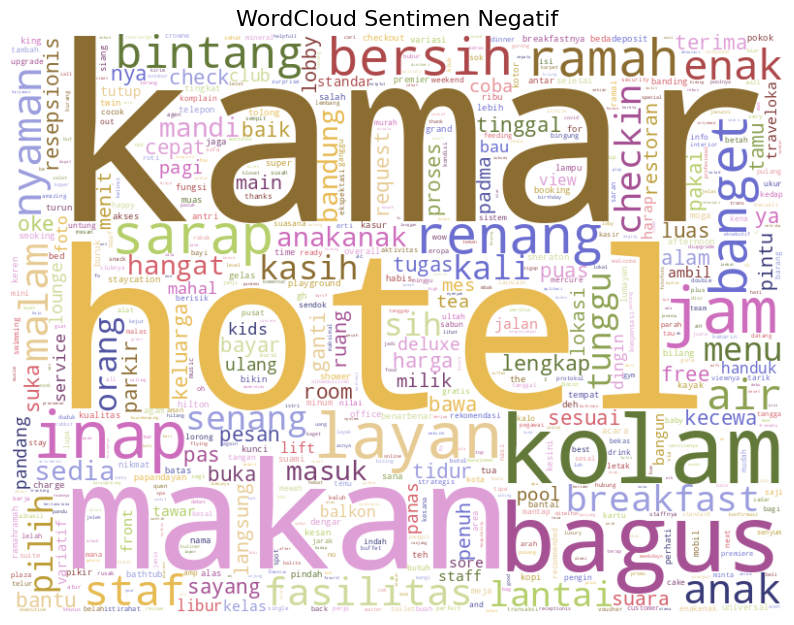

In [ ]:
# Membuat WordCloud untuk sentimen negatif
wordcloud_negatif = WordCloud(max_words=50000, background_color='white', colormap='tab20b_r',
                             width=800, height=600).generate_from_frequencies(kata_negatif)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('WordCloud Sentimen Negatif', fontsize=16)
plt.axis('off')
plt.show()

In [ ]:
# Membuat list dari kalimat-kalimat positif
kalimat_positif = data[data['Sentiment'] == 'Positive']['Stemming'].tolist()

# Mengubah kalimat-kalimat menjadi daftar kata-kata
daftar_kata_positif = [kalimat.split() for kalimat in kalimat_positif]

# Menggunakan TransactionEncoder untuk mengubah daftar kata menjadi bentuk yang sesuai untuk Apriori
te = TransactionEncoder()
te_ary_positif = te.fit_transform(daftar_kata_positif)
df_positif = pd.DataFrame(te_ary_positif, columns=te.columns_)

# Menerapkan Analisis Asosiasi dengan metode Apriori
frequent_itemsets_positif = apriori(df_positif, min_support=0.1, use_colnames=True)
rules_positif = association_rules(frequent_itemsets_positif, metric="confidence", min_threshold=0.7)

# Menampilkan aturan-aturan asosiasi dari sentimen positif
print("Asosiasi Kata dari Sentimen Positif:")
rules_positif


Asosiasi Kata dari Sentimen Positif:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bersih),(kamar),0.272251,0.443598,0.191337,0.702797,1.584310,0.070567,1.872128
1,(renang),(kolam),0.156592,0.164683,0.144693,0.924012,5.610837,0.118905,10.992765
2,(kolam),(renang),0.164683,0.156592,0.144693,0.878613,5.610837,0.118905,6.948075


In [ ]:
# Membuat list dari kalimat-kalimat negatif
kalimat_negatif = data[data['Sentiment'] == 'Negative']['Stemming'].tolist()

# Mengubah kalimat-kalimat menjadi daftar kata-kata
daftar_kata_negatif = [kalimat.split() for kalimat in kalimat_negatif]

# Menggunakan TransactionEncoder untuk mengubah daftar kata menjadi bentuk yang sesuai untuk Apriori
te = TransactionEncoder()
te_ary_negatif = te.fit_transform(daftar_kata_negatif)
df_negatif = pd.DataFrame(te_ary_negatif, columns=te.columns_)

# Menerapkan Analisis Asosiasi dengan metode Apriori
frequent_itemsets_negatif = apriori(df_negatif, min_support=0.1, use_colnames=True)
rules_negatif = association_rules(frequent_itemsets_negatif, metric="confidence", min_threshold=0.9)

# Menampilkan aturan-aturan asosiasi dari sentimen negatif
print("Asosiasi Kata dari Sentimen Negatif:")
rules_negatif

Asosiasi Kata dari Sentimen Negatif:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bintang),(hotel),0.225962,0.682692,0.211538,0.936170,1.371292,0.057276,4.971154
1,(hangat),(kolam),0.158654,0.322115,0.144231,0.909091,2.822252,0.093126,7.456731
2,(harga),(kamar),0.120192,0.692308,0.110577,0.920000,1.328889,0.027367,3.846154
3,(mandi),(kamar),0.134615,0.692308,0.125000,0.928571,1.341270,0.031805,4.307692
4,(masuk),(kamar),0.158654,0.692308,0.144231,0.909091,1.313131,0.034393,3.384615
5,(sih),(kamar),0.115385,0.692308,0.105769,0.916667,1.324074,0.025888,3.692308
6,(renang),(kolam),0.278846,0.322115,0.259615,0.931034,2.890376,0.169795,9.829327
7,"(air, hangat)",(kolam),0.120192,0.322115,0.110577,0.920000,2.856119,0.071861,8.473558
8,"(renang, air)",(kolam),0.134615,0.322115,0.125000,0.928571,2.882729,0.081638,9.490385
9,"(bersih, bagus)",(kamar),0.144231,0.692308,0.129808,0.900000,1.300000,0.029956,3.076923
